# Analysis of Foursquare Model Weight
# NYU - CUSP UDP Capstone
# Foursquare + TWITTER + CENSUS NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing
    - import Models Weight
    - Plot top 10 most important weights for every model
    
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [6]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
weights_results = ['gent00_16.csv','Ongoing_adv_gent.csv',\
'pct_ch_hinc00_16.csv','pct_ch_medrent00_16.csv','pct_ch_medhval00_16.csv',\
'pct_ch_percol00_16.csv']
# 'Supergent16.csv']
weights_results

['gent00_16.csv',
 'Ongoing_adv_gent.csv',
 'pct_ch_hinc00_16.csv',
 'pct_ch_medrent00_16.csv',
 'pct_ch_medhval00_16.csv',
 'pct_ch_percol00_16.csv']

In [20]:
weights_df_list = []
for file in weights_results:
    print(file)
    print('./Results_NYC/4_CENSUS_FQ_'+file[:-4]+'NYC.csv')
    temp = pd.read_csv('./Results_NYC/4_CENSUS_FQ_'+file[:-4]+'NYC.csv')
    temp.rename(columns={'Unnamed: 0':'St_method'}, inplace=True)
    weights_df_list.append(temp)

gent00_16.csv
./Results_NYC/4_CENSUS_FQ_gent00_16NYC.csv
Ongoing_adv_gent.csv
./Results_NYC/4_CENSUS_FQ_Ongoing_adv_gentNYC.csv
pct_ch_hinc00_16.csv
./Results_NYC/4_CENSUS_FQ_pct_ch_hinc00_16NYC.csv
pct_ch_medrent00_16.csv
./Results_NYC/4_CENSUS_FQ_pct_ch_medrent00_16NYC.csv
pct_ch_medhval00_16.csv
./Results_NYC/4_CENSUS_FQ_pct_ch_medhval00_16NYC.csv
pct_ch_percol00_16.csv
./Results_NYC/4_CENSUS_FQ_pct_ch_percol00_16NYC.csv


In [21]:
binary_typs = []
for w in weights_results:
    print(w)
    binary_typs.append(w[:-4])
binary_typs

gent00_16.csv
Ongoing_adv_gent.csv
pct_ch_hinc00_16.csv
pct_ch_medrent00_16.csv
pct_ch_medhval00_16.csv
pct_ch_percol00_16.csv


['gent00_16',
 'Ongoing_adv_gent',
 'pct_ch_hinc00_16',
 'pct_ch_medrent00_16',
 'pct_ch_medhval00_16',
 'pct_ch_percol00_16']

In [22]:
weights_df_list[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index[::-1]

Index(['Type_Residential Building (Apartment / Condo)_sum10',
       'Class_Necessary_sum10', 'Category_Consumption_sum10', 'Checkins',
       'total_tweets', 'Visits', 'hinc00', 'popden00', 'medhval00',
       'unempden00'],
      dtype='object')

In [23]:
top10_pd = pd.DataFrame()
for i, binary_target in enumerate(binary_typs):
    print(i, binary_target)
    for st_method in list(weights_df_list[i].index):
        print('st_method',st_method)
        pd_series_by_st_method = weights_df_list[i].loc[st_method]
        for k, variable in enumerate(pd_series_by_st_method[1:].abs().sort_values(ascending=False)[:10].index[::-1]):
            print(k,variable)
            top10_pd.loc[st_method,variable] = k
top10_pd

0 gent00_16
st_method 0
0 Type_Residential Building (Apartment / Condo)_sum10
1 Class_Necessary_sum10
2 Category_Consumption_sum10
3 Checkins
4 total_tweets
5 Visits
6 hinc00
7 popden00
8 medhval00
9 unempden00
st_method 1
0 Type_Burger Joint
1 Thursday_oddratio
2 Type_Cosmetics Shop
3 local_weekend_oddratio
4 Checkins
5 total_users
6 distance_to_Type_Bar
7 per_rent_00
8 Type_Apres Ski Bar_sum10
9 Type_Motel_sum10
st_method 2
0 Type_Burger Joint
1 Thursday_oddratio
2 Type_Cosmetics Shop
3 local_tweets
4 Checkins
5 total_users
6 distance_to_Type_Bar
7 per_rent_00
8 Type_Apres Ski Bar_sum10
9 Type_Motel_sum10
st_method 3
0 Type_Comfort Food Restaurant
1 pag25up00
2 distance_to_Type_Bar
3 distance_to_Type_Fried Chicken Joint
4 distance_to_Type_Coffee Shop
5 Type_Other Event
6 Type_Drugstore
7 percol00
8 Type_Arcade
9 hinc00
st_method 4
0 Type_Insurance Office_sum10
1 pag25up00
2 Type_Spa
3 distance_to_Type_Fried Chicken Joint
4 Type_Hockey Arena_sum10
5 distance_to_Type_Bar
6 distance_to_

0 Type_Plane_sum10
1 Category_Education_sum10
2 Class_Optional_sum10
3 medhval00
4 Category_Personal care_sum10
5 Type_Residential Building (Apartment / Condo)_sum10
6 Visits
7 Category_Leisure_sum10
8 Category_Social_sum10
9 hinc00
st_method 1
0 Saturday_oddratio
1 distance_to_Class_Necessary
2 Type_Plane
3 distance_to_Type_Cocktail Bar
4 Type_Sorority House_sum10
5 distToMHI
6 pnhblk00
7 Type_Moroccan Restaurant_sum10
8 medrent00
9 distance_to_Category_Income
st_method 2
0 distance_to_Class_Necessary
1 Type_Plane
2 Type_Corporate Amenity
3 Type_Sorority House_sum10
4 Type_Design Studio
5 pnhblk00
6 distToMHI
7 Type_Moroccan Restaurant_sum10
8 medrent00
9 distance_to_Category_Income
st_method 3
0 distance_to_Type_Fried Chicken Joint
1 distance_to_Type_Steakhouse
2 distance_to_Type_Juice Bar
3 Type_Library
4 Type_Sporting Goods Shop
5 distToHighVisitorTract
6 Type_Storage Facility
7 Type_Rental Service
8 Type_Fish & Chips Shop
9 medrent00
st_method 4
0 Type_University
1 distance_to_Typ

,Type_Residential Building (Apartment / Condo)_sum10,Class_Necessary_sum10,Category_Consumption_sum10,Checkins,total_tweets,Visits,hinc00,popden00,medhval00,unempden00,...,pop00,Type_Convenience Store,Type_Night Market,Type_Child Care Service,Type_Asian Restaurant,Type_General Entertainment,Type_Historic Site,Type_Plaza,Type_Deli / Bodega,distance_to_Type_Donut Shop
0,7.0,4.0,2.0,7.0,4.0,8.0,8.0,7.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,9.0,NaN,...,4.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,9.0,3.0,9.0,NaN,...,7.0,NaN,NaN,NaN,0.0,1.0,2.0,3.0,4.0,6.0
5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,9.0,NaN,...,4.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,9.0,NaN,...,4.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print(weights_results[3])
st_method = 8
print(st_method, (weights_df_list[3].loc[st_method][0]))
weights_df_list[3].loc[st_method][1:].abs().sort_values(ascending=False)[:10].index[::-1]

pct_ch_medrent00_16.csv
8 Logit_Minmaxed


Index(['distance_to_Type_Fried Chicken Joint', 'distance_to_Type_Steakhouse',
       'distance_to_Type_Juice Bar', 'Type_Library',
       'Type_Sporting Goods Shop', 'distToHighVisitorTract',
       'Type_Storage Facility', 'Type_Rental Service',
       'Type_Fish & Chips Shop', 'medrent00'],
      dtype='object')

medhval00                       102.0
percol00                         99.0
medrent00                        93.0
Type_Motel_sum10                 54.0
Type_Industrial Estate_sum10     54.0
distance_to_Type_Bar             53.0
Type_Apres Ski Bar_sum10         48.0
distance_to_Type_Gastropub       48.0
Type_Amphitheater_sum10          48.0
per_rent_00                      47.0
dtype: float64


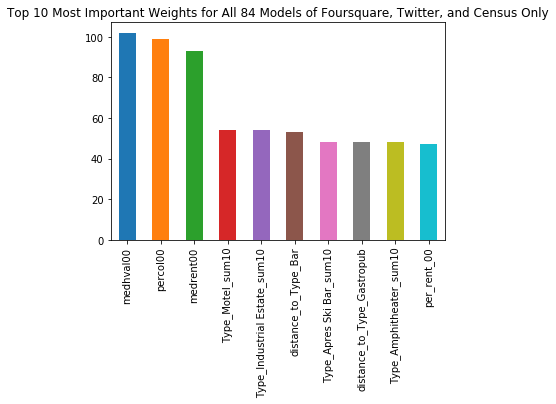

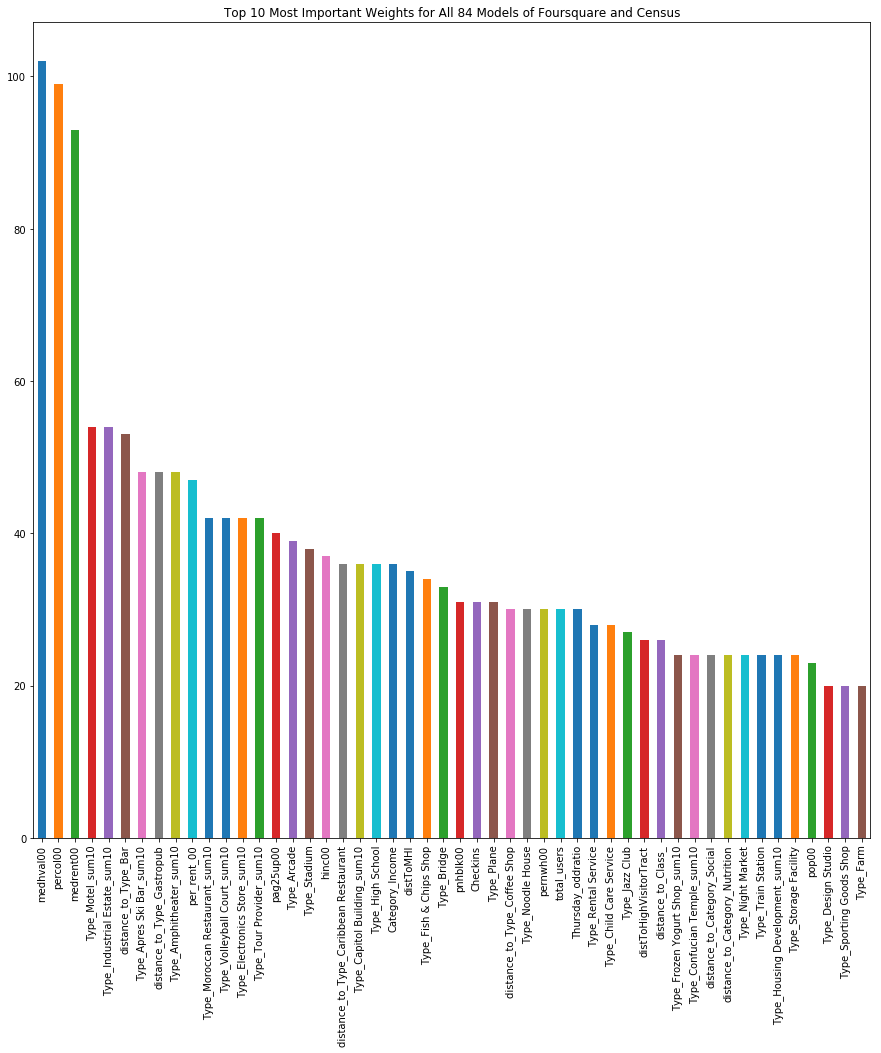

In [25]:
print(top10_pd.sum(axis=0).sort_values(ascending=False)[:10])
top10_pd.sum(axis=0).sort_values(ascending=False)[:10].plot(kind='bar', title = 'Top 10 Most Important Weights for All 84 Models of Foursquare, Twitter, and Census Only')
plt.show()
top10_pd.sum(axis=0).sort_values(ascending=False)[:50].plot(kind='bar', figsize = (15,15), title = 'Top 10 Most Important Weights for All 84 Models of Foursquare and Census')

In [26]:
# top10_pd = pd.DataFrame():
# for binary_variable in binary_variables:
#     top10_pd[binary_variable] = weights_df[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index